In [1]:
import numpy as np

In [2]:
%pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [8]:
import pandas as pd

root_path = '/content/output.csv'

df = pd.read_csv(root_path)
df.head()

,emotion,message
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...
4,angry,রাতের বেলা আবার কিসের সকাল।


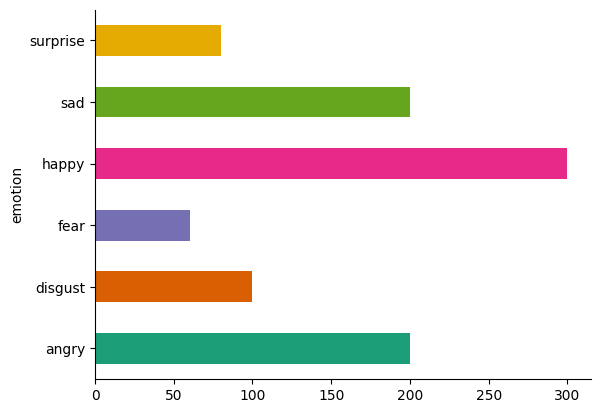

In [ ]:
# @title emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df['count'] = df['message'].apply(lambda x: len(x.split()))

In [10]:
df['encoded_text'] = df['emotion'].astype('category').cat.codes

df.head(10)

,emotion,message,count,encoded_text
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",353,4
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,72,4
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,12,0
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,25,3
4,angry,রাতের বেলা আবার কিসের সকাল।,5,0
5,sad,মনে রাকবেন এই বেহাইয়াপনাতে মা ও বোনদের সসম্মান...,33,4
6,disgust,কবে যানি ভূকম্পনে এ রমনা বটমূল মাটির সাথে মিশে...,14,1
7,angry,নাস্তিকরা কমতেছে তো,3,0
8,surprise,এবার লোকসমাগম খুব কম হয়েছে যা প্রশ্নই থেকে যায়...,11,5
9,sad,কেয়ামতের তোমাদের ছায়া নট।,4,4


In [11]:
!pip install bangla-stemmer

In [12]:
from bangla_stemmer.stemmer import stemmer

stmr = stemmer.BanglaStemmer()

valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set([''])
stop_words_file_lines=open('/content/stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = []
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                correct_word = ''
        if correct_word not in stop_words:
            unique_words_per_sentence.append(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(stmr.stem(unique_words_per_sentence))

    return new_refined_sentence

df["text_clean"] = df["message"].apply(lambda x: puncuation_removal(x))
df.head()

Streaming output truncated to the last 5000 lines.
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second 

,emotion,message,count,encoded_text,text_clean
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",353,4,মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ ...
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,72,4,তদন্ত লাভ তদন্ত হয় মন রাজনৈতিক শক্তির তদন্ত পা...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,12,0,দেশকি মধ্যম আয় দেশ রুপান্তর মগ মুলুক দেশ পরিনত
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,25,3,গর্বিত চির আল্লাহ ছার নিচু নার তাকবির আল্লাহু
4,angry,রাতের বেলা আবার কিসের সকাল।,5,0,রাত বেলা কিস


In [13]:
df.head(20)

,emotion,message,count,encoded_text,text_clean
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",353,4,মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ ...
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,72,4,তদন্ত লাভ তদন্ত হয় মন রাজনৈতিক শক্তির তদন্ত পা...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,12,0,দেশকি মধ্যম আয় দেশ রুপান্তর মগ মুলুক দেশ পরিনত
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,25,3,গর্বিত চির আল্লাহ ছার নিচু নার তাকবির আল্লাহু
4,angry,রাতের বেলা আবার কিসের সকাল।,5,0,রাত বেলা কিস
5,sad,মনে রাকবেন এই বেহাইয়াপনাতে মা ও বোনদের সসম্মান...,33,4,রাক বেহাইয়াপনাতে মা বোন সসম্মান বাড়ছেনা তোমা ই...
6,disgust,কবে যানি ভূকম্পনে এ রমনা বটমূল মাটির সাথে মিশে...,14,1,যানি ভূকম্পনে রমনা বটমূল মাটি সাথে মিশে আল্লাহ...
7,angry,নাস্তিকরা কমতেছে তো,3,0,নাস্তিক কমত
8,surprise,এবার লোকসমাগম খুব কম হয়েছে যা প্রশ্নই থেকে যায়...,11,5,লোকসমাগম কম হয় প্রশ্ন যায়
9,sad,কেয়ামতের তোমাদের ছায়া নট।,4,4,কেয়ামত তোমা ছায়া


In [14]:
category_count = df['emotion'].value_counts()

categories = category_count.index

categories

Index(['happy', 'angry', 'sad', 'disgust', 'surprise', 'fear'], dtype='object')

In [15]:
category_count

happy       3816
angry       2832
sad         2682
disgust     1406
surprise    1124
fear         768
Name: emotion, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# df = data[['text_clean', 'Label']]

# Y = pd.get_dummies(data['category']).values
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['encoded_text'], random_state=42, stratify=df['encoded_text'])
print(np.unique(y_train))

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

[0 1 2 3 4 5]


In [32]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [33]:
from transformers import BertModel, BertTokenizer, TFBertModel

bert_model_name = "sagorsarker/bangla-bert-base"
bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = TFBertModel.from_pretrained(bert_model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

print(tf.config.list_physical_devices('GPU'))

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask')

inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

outputs = bert_model(inputs)

pooled_output = outputs.pooler_output
pooled_output = Dropout(0.9)(pooled_output)

hidden_layer = Dense(64, activation='relu')(pooled_output)
hidden_layer = Dropout(0.7)(hidden_layer)

num_classes = 6
classification_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(pooled_output)

# Define model inputs and outputs
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
outputs = {'classification': classification_layer}

# Define model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

In [36]:
# model.fit(X_train, y_train, epochs=2)
train_encodings = bert_tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=2)

history = model.fit(
    x=(train_encodings['input_ids'], train_encodings['attention_mask']),
    y=y_train,
    epochs=2,
    batch_size=32
)

Epoch 1/2
296/296 [==============================] - 273s 786ms/step - loss: 3.5708 - accuracy: 0.7559 - precision: 0.2162 - recall: 0.1771
Epoch 2/2
296/296 [==============================] - 232s 785ms/step - loss: 2.3325 - accuracy: 0.7847 - precision: 0.2241 - recall: 0.1186


In [37]:
model.save('/content/BERT.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# Define the custom object scope
custom_objects = {'TFBertModel': TFBertModel}

# Load the model using the custom object scope
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model('/content/BERT.h5')


test_encodings = bert_tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Get the predicted labels for the test data
yy_pred = model.predict(x=(test_encodings['input_ids'], test_encodings['attention_mask']))
y_pred = np.argmax(yy_pred['classification'], axis=1)# y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

99/99 [==============================] - 30s 276ms/step
[[  0   0   0 708   0   0]
 [  0   0   0 352   0   0]
 [  0   0   0 192   0   0]
 [  0   0   0 954   0   0]
 [  0   0   0 670   0   0]
 [  0   0   0 281   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       708
           1       0.00      0.00      0.00       352
           2       0.00      0.00      0.00       192
           3       0.30      1.00      0.46       954
           4       0.00      0.00      0.00       670
           5       0.00      0.00      0.00       281

    accuracy                           0.30      3157
   macro avg       0.05      0.17      0.08      3157
weighted avg       0.09      0.30      0.14      3157



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
test_encodings['input_ids']
test_encodings['attention_mask']

<tf.Tensor: shape=(3157, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [39]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer, TFBertModel

# Load the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

# Sample text for testing
sample_text = "আমি মুসলিমদের ঘৃণা করি"

# Encode the sample text using the BERT tokenizer
sample_encoding = bert_tokenizer(sample_text, padding=True, truncation=True, max_length=128, return_tensors='tf')

# Get the predicted label for the sample text
sample_prediction = model.predict(x=(sample_encoding['input_ids'], sample_encoding['attention_mask']))
sample_pred_label = np.argmax(sample_prediction['classification'], axis=1)

# Print the predicted label
print("Predicted Label:", sample_pred_label)


1/1 [==============================] - 4s 4s/step
Predicted Label: [3]


In [22]:
df.head(200)

,emotion,message,count,encoded_text,text_clean
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",353,4,মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ ...
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,72,4,তদন্ত লাভ তদন্ত হয় মন রাজনৈতিক শক্তির তদন্ত পা...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,12,0,দেশকি মধ্যম আয় দেশ রুপান্তর মগ মুলুক দেশ পরিনত
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,25,3,গর্বিত চির আল্লাহ ছার নিচু নার তাকবির আল্লাহু
4,angry,রাতের বেলা আবার কিসের সকাল।,5,0,রাত বেলা কিস
...,...,...,...,...,...
195,fear,আজ যদি তনুর বিচার না হয় কাল তোর বোনের ধর্ষিতার...,15,2,তনুর বিচ কাল তোর বোন ধর্ষিত বিচ রাখোস
196,sad,কি পেয়েছি আমরা শাদিন দেশে চুর বাটপার,7,4,পেয়েছি শাদিন দেশ চুর বাটপ
197,sad,৭১ টিভি ও ফ্রেশ ব্র্যান্ডের সকল পন্য বর্জন করু...,164,4,টিভি ফ্রেশ ব্র্যান্ড সকল পন্য বর্জন ফ্রেশ বাংল...
198,sad,সোয়াবের কাজ বিনা হিসাবে জাহান্নাম।,5,4,সোয়াব
